In [199]:
from itertools import combinations

import numpy as np
from matplotlib import pyplot as plt

from sampling import sample_standard_simplex
from projecting import capped_simplex_projection, kullbeck_leibler_projection

# Kullback Leibler Divergence

$p,q$ two distributions over measure space $\Omega$.

$$KL(p \Vert q) = \int_{\Omega} p(\omega) \ln\left(\frac{p(\omega)}{q(\omega)}\right) d\omega$$

Also known as the relative entropy of $p$ w.r.t $q$.

The minimum is established at $p=q$.


Lemma [Gibbs Inequality]: $KL(p\Vert q) \geq 0$ in the discrete case.

Proof: Use the inequality $\ln(x) \leq x-1$ for $x>0$. Then, $KL(p \Vert q) = \sum_{i=1}^N p_i \ln(p_i/q_i) = - \sum_{i=1}^N p_i \ln(q_i/p_i) \geq - \sum_{i=1}^N p_i (q_i/p_i -1) = \sum_{i=1}^N q_i - \sum_{i=1}^N p_i = 0$. QED

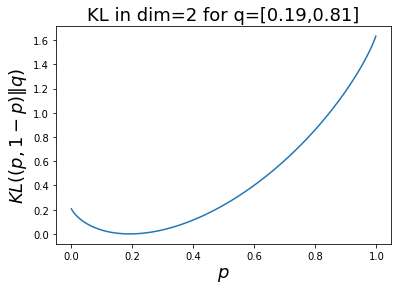

In [200]:
q = sample_standard_simplex(2)

a = np.arange(0,1,0.001)[1:-1]
ps = np.array([a,1-a]).T

%matplotlib inline

plt.plot(a,np.diag(ps@(np.log(ps/q).T)))
plt.xlabel(r'$p$',fontsize=18)
plt.ylabel(r'$KL((p,1-p)\Vert q)$',fontsize=18)
plt.title('KL in dim=2 for q=[{:.2f},{:.2f}]'.format(q[0],q[1]),fontsize=18);

# Kullback Leibler Projection

Let $\alpha \geq 1$.

Let $\Delta_n = \{\mathbf{p} \in \mathbb{R}^n \,\vert\, \sum_i \mathbf{p}_i = 1, \mathbf{p}_i \geq 0 \}$ and $\Gamma = \{ \mathbf{p} \in \mathbb{R}^n \,\vert\, \mathbf{p} \leq \frac{\alpha}{n}\}$.

Given $\mathbf{q} \in \Delta_n$, we wish to find $\mathbf{p}_* \in \Gamma \cap \Delta_n$ that is the KL projection of $\mathbf{q}$ on $\Gamma \cap \Delta_n$, namely,
$$ \Pi_{\Gamma,d_{KL}}(\mathbf{q}) = \arg \min_{\mathbf{p} \in \Gamma \cap \Delta_n} KL(\mathbf{p} \Vert \mathbf{q})$$

This minimization problem was solved by Herbster and Warmuth in *Tracking the Best Linear Predictor*.
https://dl.acm.org/doi/10.1162/153244301753683726


In [201]:
dim = 3
alpha = 1.3

w_init = sample_standard_simplex(dim)
w_init

array([0.05912693, 0.52631351, 0.41455956])

In [202]:
v_kl = kullbeck_leibler_projection(w_init,alpha)
v_kl

array([0.13333333, 0.43333333, 0.43333333])

In [203]:
v_l2 = capped_simplex_projection(w_init, k=1., t=alpha/dim)
v_l2

array([0.13333333, 0.43333333, 0.43333333])

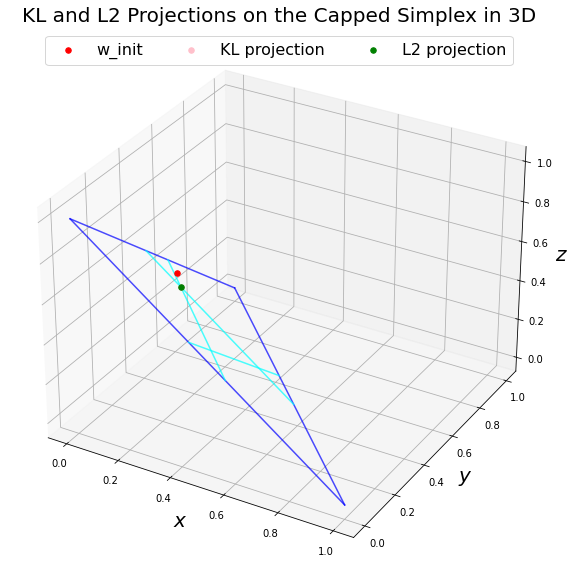

In [208]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for endpoints in [*combinations(np.diag(np.ones(dim)),2)]:
    P = np.vstack(endpoints)
    ax.plot(P[:,0],P[:,1],P[:,2],c='blue',alpha=0.7)
    
lines = []
for i in range(dim):
    ls = []
    for j in range(dim):
        if i!=j:
            l = np.zeros(dim)
            l[i] = alpha/dim
            l[j] = 1-alpha/dim
            ls.append(l)
    lines.append(np.vstack(ls))

for line in lines:
    ax.plot(line[:,0],line[:,1],line[:,2],c='cyan',alpha=0.7)
    
ax.scatter(np.atleast_2d(w_init)[:,0],np.atleast_2d(w_init)[:,1],np.atleast_2d(w_init)[:,2],s=30,c='red',alpha=1,label='w_init',zorder=0)
ax.scatter(np.atleast_2d(v_kl)[:,0],np.atleast_2d(v_kl)[:,1],np.atleast_2d(v_kl)[:,2],s=30,c='pink',alpha=1,label='KL projection',zorder=0)
ax.scatter(np.atleast_2d(v_l2)[:,0],np.atleast_2d(v_l2)[:,1],np.atleast_2d(v_l2)[:,2],s=30,c='green',alpha=1,label='L2 projection',zorder=0)

ax.legend(loc='upper center',fontsize=16, ncol=3)

ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$z$', fontsize=20)
ax.set_title('KL and L2 Projections on the Capped Simplex in {}D'.format(dim),fontsize=20)

plt.show()